In [1]:
import pandas as pd

In [9]:
file_path = '../data/training_data.csv'

data = pd.read_csv(file_path)
data

,Red,Green,Blue,NIR,ndvi,ndwi,msavi2,mtvi2,vari,tgi,Class
0,1376.0,1150.0,795.0,2598.0,0.307499,-0.386339,0.470314,0.338574,-0.130560,13390.0,0
1,1342.0,1101.0,776.0,2676.0,0.332006,-0.416998,0.498459,0.360913,-0.144571,11065.0,0
2,1347.0,1101.0,785.0,2671.0,0.329517,-0.416225,0.495648,0.356393,-0.147925,10350.0,0
3,1303.0,1140.0,722.0,2628.0,0.337064,-0.394904,0.504138,0.393367,-0.094712,19375.0,0
4,1358.0,1141.0,727.0,2758.0,0.340136,-0.414722,0.507569,0.380207,-0.122460,17245.0,0
...,...,...,...,...,...,...,...,...,...,...,...
48137,2493.0,2214.0,1764.0,2726.0,0.044645,-0.103644,0.085459,-0.022867,-0.094801,17235.0,2
48138,2517.0,2298.0,1835.0,2722.0,0.039130,-0.084462,0.075299,-0.010665,-0.073490,20115.0,2
48139,2452.0,2291.0,1868.0,2724.0,0.052550,-0.086341,0.099837,0.032247,-0.056000,19745.0,2
48140,2285.0,2130.0,1642.0,2595.0,0.063525,-0.098413,0.119440,0.049287,-0.055896,23855.0,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48142 entries, 0 to 48141
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Red     48142 non-null  float64
 1   Green   48142 non-null  float64
 2   Blue    48142 non-null  float64
 3   NIR     48142 non-null  float64
 4   ndvi    48142 non-null  float64
 5   ndwi    48142 non-null  float64
 6   msavi2  48142 non-null  float64
 7   mtvi2   48142 non-null  float64
 8   vari    48142 non-null  float64
 9   tgi     48142 non-null  float64
 10  Class   48142 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 4.0 MB


In [11]:
data['Class'].nunique()

3

## Analysis

In [19]:
# Checking the class distribution to see if there is any imbalance
class_distribution = data['Class'].value_counts()
print(class_distribution) 
(class_distribution/class_distribution.sum())*100

1    25552
2    15650
0     6940
Name: Class, dtype: int64


1    53.076316
2    32.507997
0    14.415687
Name: Class, dtype: float64

In [15]:
# Checking for feature correlations
correlation_matrix = data.corr()
correlation_matrix

,Red,Green,Blue,NIR,ndvi,ndwi,msavi2,mtvi2,vari,tgi,Class
Red,1.000000,0.990907,0.934538,0.843365,-0.077243,-0.490960,-0.061093,-0.634656,-0.164237,0.418166,0.494163
Green,0.990907,1.000000,0.961763,0.824631,-0.082578,-0.442543,-0.066907,-0.594727,-0.152785,0.407203,0.499765
Blue,0.934538,0.961763,1.000000,0.710891,-0.174136,-0.302294,-0.147078,-0.570900,-0.128995,0.161790,0.570123
NIR,0.843365,0.824631,0.710891,1.000000,0.373220,-0.829117,0.347394,-0.396742,-0.162309,0.569173,0.051343
ndvi,-0.077243,-0.082578,-0.174136,0.373220,1.000000,-0.666480,0.982461,0.575965,0.078643,0.314650,-0.562249
ndwi,-0.490960,-0.442543,-0.302294,-0.829117,-0.666480,1.000000,-0.646611,0.209786,0.134814,-0.489787,0.234023
msavi2,-0.061093,-0.066907,-0.147078,0.347394,0.982461,-0.646611,1.000000,0.578523,0.084768,0.273237,-0.485379
mtvi2,-0.634656,-0.594727,-0.570900,-0.396742,0.575965,0.209786,0.578523,1.000000,0.240672,-0.105948,-0.502094
vari,-0.164237,-0.152785,-0.128995,-0.162309,0.078643,0.134814,0.084768,0.240672,1.000000,-0.091138,-0.050381
tgi,0.418166,0.407203,0.161790,0.569173,0.314650,-0.489787,0.273237,-0.105948,-0.091138,1.000000,-0.135606


## Histogram

In [16]:
import seaborn as sns

<Axes: xlabel='ndvi', ylabel='Count'>

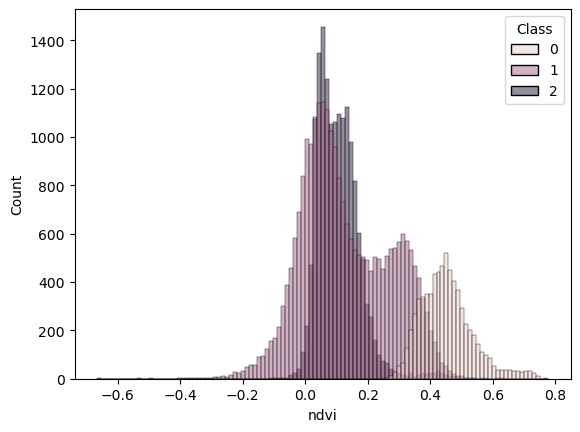

In [17]:
sns.histplot(data=data, x='ndvi', hue='Class')